In [1]:
from feature_detection.darkflow.net.build import TFNet
import cv2
import pandas as pd
import labelscount
from IPython.display import Image
import matplotlib.pyplot as plt
import math

# Load TFNet

In [2]:
options = {"model": "./feature_detection/cfg/road_yolo.cfg",
           "config": "./feature_detection/cfg",
           "load": -1,
           "batch" : 4,
           "labels": "./feature_detection/labels.txt",
           'backup': "./feature_detection/model",
           "gpu": 0.0}

light_windows_tfnet = TFNet(options)

Parsing ./feature_detection/cfg/road_yolo.cfg
Loading None ...
Finished in 0.0s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Init  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 7

In [3]:
car_options = {"model": "./feature_detection/cfg/yolo.cfg", 
           "load": "./feature_detection/bin/yolo.weights",
           "config": "./feature_detection/cfg",
           "batch" : 4,
           "labels": "./feature_detection/labels.txt",
           "gpu": 0.0}

# options
car_tfnet = TFNet(car_options)

Parsing ./feature_detection/cfg\yolo.cfg
Parsing ./feature_detection/cfg/yolo.cfg
Loading ./feature_detection/bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 1.640350103378296s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0

# Read Crime and Safe file

In [4]:
# Paths
crime_path = './dataset/crime_locations.csv'
safe_path = './dataset/safe_locations.csv'

In [8]:
crime_df = pd.read_csv(crime_path)
crime_df

,id,windows,car,lights,gas,convenience,sdpd,lampdist,lat,lon,crime
0,2012_227,0,6,0,736,468,2421,120.00,32.775964,-117.139384,ROBBERY
1,2012_312,0,3,2,203,258,1289,31.62,32.755363,-117.097314,ROBBERY
2,2011_351,0,5,4,352,362,309,14.14,32.710799,-117.140230,ROBBERY
3,2012_499,0,5,4,899,899,1329,22.36,32.720864,-117.153392,ROBBERY
4,2011_575,0,5,5,330,383,202,14.14,32.748382,-117.158085,ROBBERY
5,2011_600,8,3,23,291,390,1422,10.00,32.710971,-117.159208,ROBBERY
6,2011_654,2,2,3,735,815,669,10.00,32.716232,-117.160161,ROBBERY
7,2012_663,0,7,1,1244,1244,797,22.36,32.702018,-117.112507,ROBBERY
8,2011_696,0,2,0,2295,104,852,41.23,32.739085,-117.100972,ROBBERY
9,2011_734,0,6,3,1104,1421,1278,22.36,32.759012,-117.079444,ROBBERY


In [9]:
safe_df = pd.read_csv(safe_path)
safe_df

,id,windows,car,lights,gas,convenience,sdpd,lampdist,lat,lon,crime
0,s_0,0,7,4,885,1420,3698,15.491717,32.594749,-117.084097,safe
1,s_1,0,1,0,2100,1531,1815,43.872941,32.584117,-117.073782,safe
2,s_2,0,4,0,578,486,2147,70.877100,32.584009,-117.065199,safe
3,s_3,0,1,1,1238,1239,2648,25.571291,32.557387,-117.084123,safe
4,s_4,0,1,0,9624,10812,13115,39.372835,32.546825,-117.065841,safe
5,s_5,0,1,2,2128,2124,4993,18.176018,32.565706,-117.049876,safe
6,s_6,0,0,0,766,762,2958,53.970956,32.561149,-117.049361,safe
7,s_7,0,2,1,747,781,2462,33.506199,32.571493,-117.058202,safe
8,s_8,0,6,0,855,869,3348,37.882438,32.583861,-117.052537,safe
9,s_9,0,4,0,1346,1346,3614,48.860448,32.577778,-117.045437,safe


# Start to detect the crime street view.

In [ ]:
# Scan pictures
streetview_path = './dataset/crime_streetview/'
pic_num = 4;

for index in range(len(crime_df)):
    crime_id = crime_df.at[index,"id"]
    car_sum = 0
    for num in range(pic_num):
        picture_name = crime_id+"_" + str(num) + ".jpg"
        street_img = cv2.imread(streetview_path+picture_name)
        street_img = cv2.cvtColor(street_img, cv2.COLOR_BGR2RGB)

        scan_results = light_windows_tfnet.return_predict(street_img)
        window_result = [aresult for aresult in scan_results if aresult['label'] == "window" and aresult['confidence'] > 0.1]
        final_result = labelscount.mergeoverlaylabel(window_result)
        crime_df.at[index,"windows"]  +=len(final_result)

        
        scan_results = car_tfnet.return_predict(street_img)
        car_result = [aresult for aresult in scan_results if (aresult['label'] == "car" or aresult['label'] == "truck") and aresult['confidence'] > 0.3]
        final_result = labelscount.mergeoverlaylabel(car_result)
        car_sum += len(final_result)
    
    crime_df.at[index,"car"]  =math.ceil(car_sum/2)

In [ ]:
# crime_df
crime_df.to_csv("./dataset/crime_locations.csv", index=False)

# Start to detect the safe street view.

In [ ]:
# Scan pictures
streetview_path = './dataset/safe_streetview/'
pic_num = 4;

for index in range(len(safe_df)):
    safe_id = safe_df.at[index,"id"]
    car_sum = 0
    for num in range(pic_num):
        picture_name = safe_id+"_" + str(num) + ".jpg"
        street_img = cv2.imread(streetview_path+picture_name)
        street_img = cv2.cvtColor(street_img, cv2.COLOR_BGR2RGB)

        scan_results = light_windows_tfnet.return_predict(street_img)
        window_result = [aresult for aresult in scan_results if aresult['label'] == "window" and aresult['confidence'] > 0.1]
        final_result = labelscount.mergeoverlaylabel(window_result)
        safe_df.at[index,"windows"]  +=len(final_result)
        
        scan_results = car_tfnet.return_predict(street_img)
        car_result = [aresult for aresult in scan_results if (aresult['label'] == "car" or aresult['label'] == "truck") and aresult['confidence'] > 0.3]
        final_result = labelscount.mergeoverlaylabel(car_result)
        car_sum += len(final_result)
    
    safe_df.at[index,"car"]  =math.ceil(car_sum/2)

safe_df

In [ ]:
# safe_df
safe_df.to_csv("./dataset/safe_locations.csv", index=False)

# Detect and Show labels

In [8]:
# import importlib
# # import foo #import the module here, so that it can be reloaded.
# importlib.reload(labelscount)

(-0.5, 639.5, 639.5, -0.5)

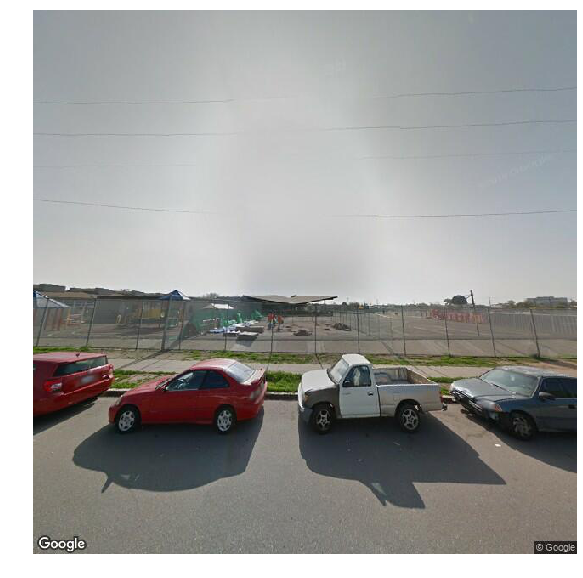

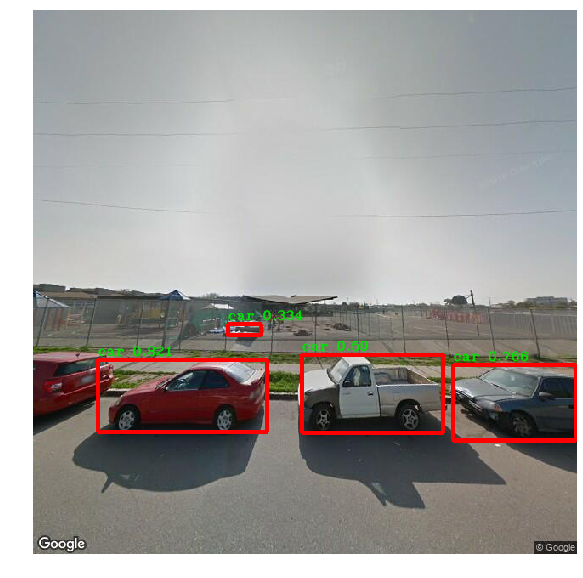

In [10]:
streetview_path = './dataset/safe_streetview/'

# picture_name = "s_163_2.jpg"
picture_name = "s_74_2.jpg"
street_img = cv2.imread(streetview_path+picture_name)
street_img = cv2.cvtColor(street_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = [10,10])
plt.imshow(street_img)
plt.axis('off')

scan_results = light_windows_tfnet.return_predict(street_img)
window_result = [aresult for aresult in scan_results if aresult['label'] == "window" and aresult['confidence'] > 0.1]
final_result = labelscount.mergeoverlaylabel(window_result)

scan_results = car_tfnet.return_predict(street_img)
car_result = [aresult for aresult in scan_results if (aresult['label'] == "car" or aresult['label'] == "truck") and aresult['confidence'] > 0.3]
final_result += labelscount.mergeoverlaylabel(car_result)


box_image = labelscount.boxing(street_img,final_result, confidence=0.1)

plt.figure(figsize = [10,10])
plt.imshow(box_image)
plt.axis('off')